---

# Main Script for Model Training and Prediction

In [1]:
import config as cf
import torch.optim as optim
from myutils.data_util import data_read, split_and_load
import model.model_repo as model_repo
from myutils.model_training_util import train_model, monitor_learning, model_predict

---

## Data Part

1. Choose the features and labels for the model.
2. Set the random seed and proportion for splitting the data.
3. Read the data from the file.
4. Split and load data into training and testing loaders.
5. Plot the data distribution.

In [2]:
# Configuration and Hyperparameters
FEATURES = ['Z', 'N', 'N-Z', 'A', 'P', 'D']
LABELS = ['LDM_residual(MeV)']
RANDOM_SEED = 39
TRAIN_PROPORTION = 0.8

In [3]:
# Data Reading
DATASET = data_read(features=FEATURES, labels=LABELS, filepath=cf.TRAIN_DATA_PATH)

Number of samples in the entire dataset: 2373
The third one, as an example, is:
(tensor([ 9.,  8., -1., 17.,  0.,  0.], device='cuda:0'), tensor([0.5975], device='cuda:0'))


After data split by the random seed 39
Number of samples in the training set: 1899
Number of samples in the test set: 474
Number of batches in the train_loader: 1
Number of batches in the test_loader: 1
Sample distribution: Figure(1600x1000)


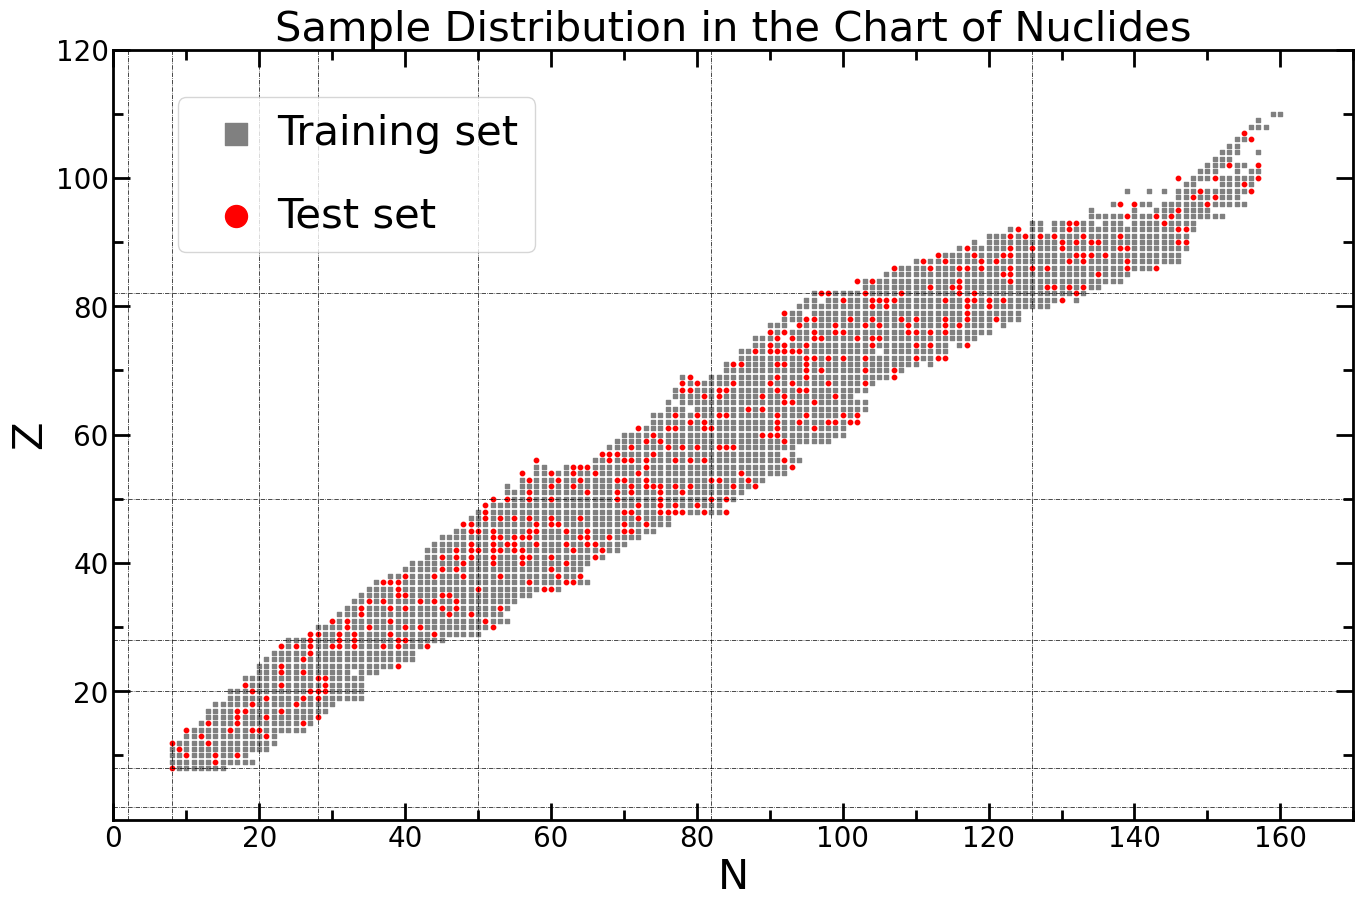

In [4]:
# Data Splitting and Plotting
TRAIN_LOADER, TEST_LOADER = split_and_load(dataset=DATASET, 
                                           random_seed=RANDOM_SEED, 
                                           train_proportion=TRAIN_PROPORTION)

---

## Model Part

1. Choose the model architecture from the repository.
2. Set the optimizer and scheduler for training.
3. Train the model.
4. Monitor the learning process by plotting the learning curve.
5. Make predictions with the trained parameters.

---

### Model20241223a

features = ['Z', 'N', 'N-Z', 'A', 'P', 'D']

labels = ['LDM_residual(MeV)']

In [5]:
# Model Configuration
MODEL = model_repo.Model20241223a().to(cf.device)
total_params = sum(p.numel() for p in MODEL.parameters())
print(f'Number of parameters in this model: {total_params}\n'
      f'{MODEL}')

Number of parameters in this model: 149665
Model20241223a(
  (conv_layers): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=384, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [6]:
OPTIMIZER = optim.AdamW(MODEL.parameters(), lr=0.001)
SCHEDULER = optim.lr_scheduler.StepLR(OPTIMIZER, step_size=10000, gamma=0.1)

In [7]:
train_model(epochs_add=2000,
            model=MODEL,
            train_loader=TRAIN_LOADER,
            test_loader=TEST_LOADER,
            optimizer=OPTIMIZER,
            monitor_interval=1000,
            scheduler=SCHEDULER,
            use_early_stopping=True,
            patience=10)

Model has already been trained for 24000 epochs, and the lowest test RMSD = 0.314878

Optimal parameters loaded from `model/parameter/param_Model20241223a.pth`

Now, training on cuda for 2000 epochs...
Training process will be recorded in `model/train_record/record_Model20241223a.txt`



  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch [25000], Test RMSD = 0.315291 doesn't improve, lowest test RMSD = 0.314878

Epoch [26000], Test RMSD = 0.315958 doesn't improve, lowest test RMSD = 0.314878



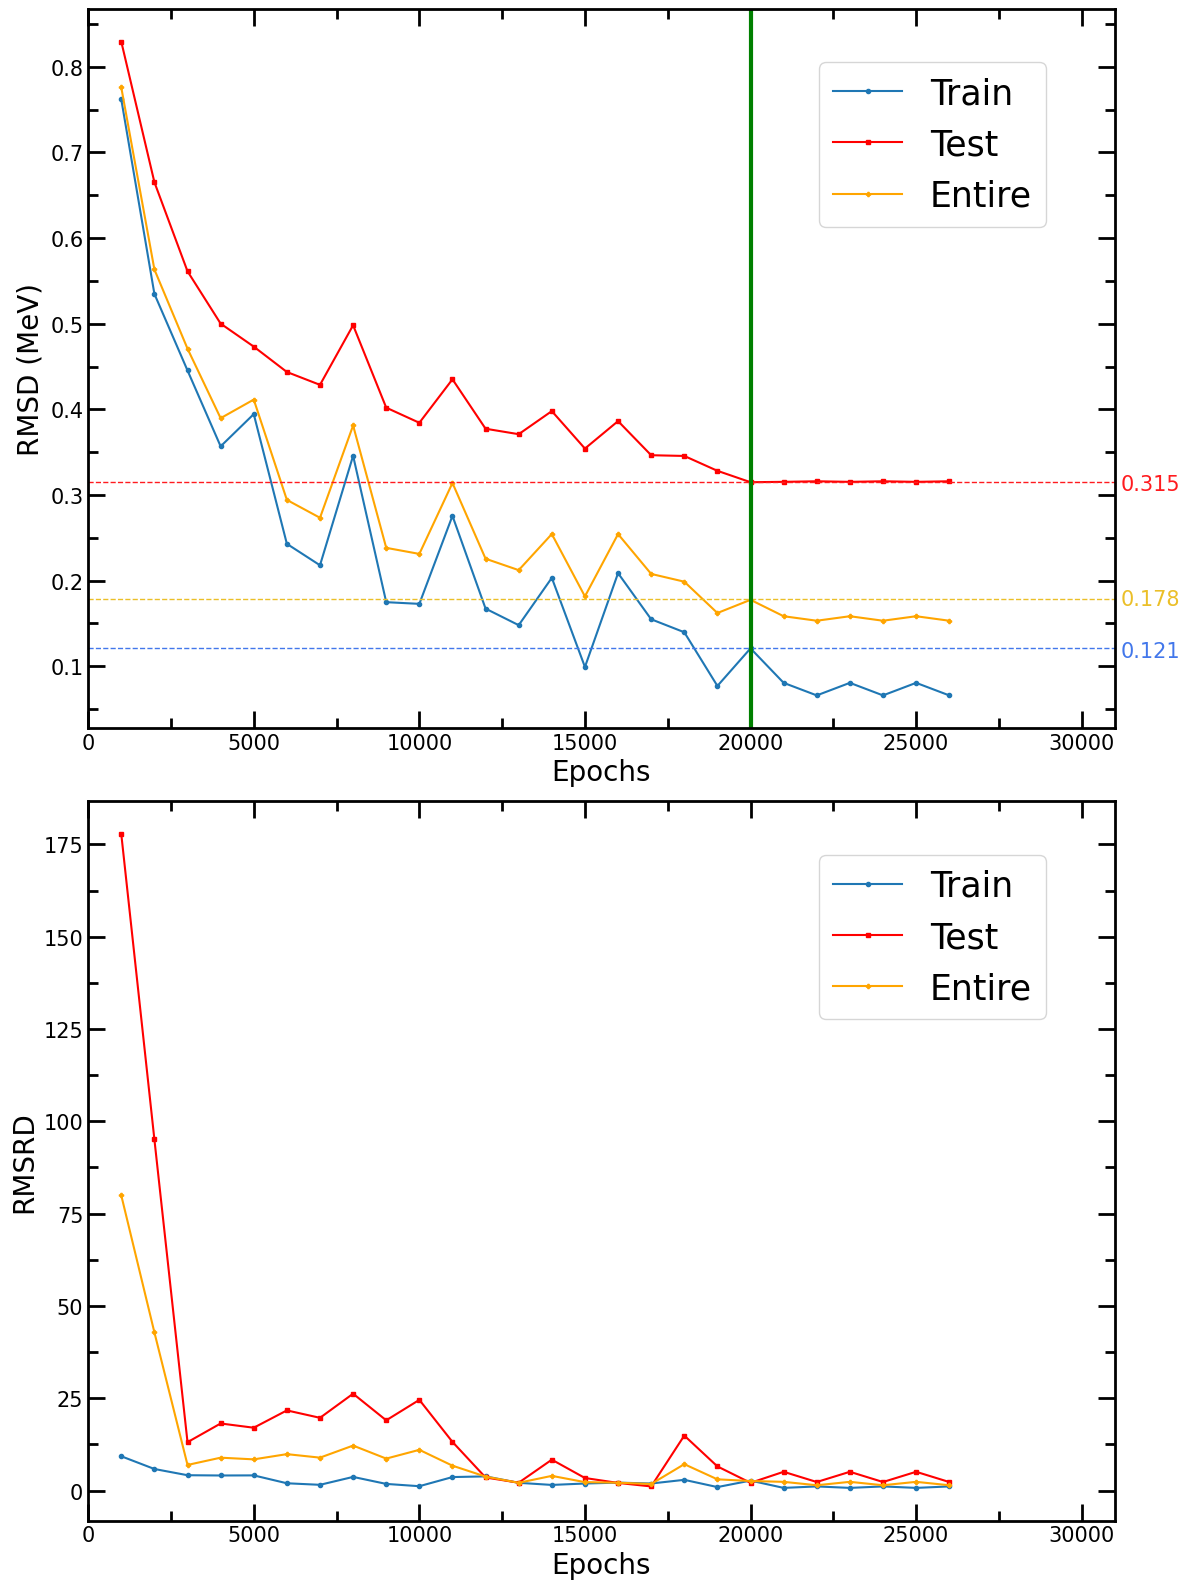

In [8]:
monitor_learning(MODEL, TRAIN_PROPORTION)

In [9]:
model_predict(MODEL, DATASET)

2373 predictions saved at `model/prediction/pred_Model20241223a.csv`
